In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [150]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [151]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_26.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,127.0882,34.1223,16.0,270.0,2022-11-16 16:56:08.041108,2022-11-16 07:55:49,2022-11-16 04:19:07,under way using engine,184.436450,306.205403
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,127.0609,34.1211,16.1,267.0,2022-11-16 17:01:11.033821,2022-11-16 08:00:55,2022-11-16 04:19:07,under way using engine,186.658612,312.035073
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.6711,34.0831,16.1,262.0,2022-11-16 18:16:53.451054,2022-11-16 09:14:25,2022-11-16 04:19:07,under way using engine,220.108466,367.952814
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.6067,34.0795,16.0,277.0,2022-11-16 18:26:58.801742,2022-11-16 09:26:25,2022-11-16 04:19:07,under way using engine,225.577733,374.509054
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.5502,34.0820,16.2,280.0,2022-11-16 18:42:07.917210,2022-11-16 09:37:09,2022-11-16 04:19:07,under way using engine,230.117608,387.353392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [152]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [153]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [154]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

224


In [155]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [156]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [157]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [158]:
distance

1325.7178036900816

In [159]:
1348.5265119662952 / 20

67.42632559831476

In [160]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [161]:
overall_length = distance
segment_length = overall_length/20

In [162]:
segment_length

66.28589018450408

In [163]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


74.30519420981277
71.40034240338963
68.15846623867361
70.09483984884616
82.56082611932622
70.11024138294692
70.80694547475466
123.33520789742383
66.77633122964147
68.41320417664105
67.06528426971842
68.09801973905442
66.94987809636005
69.18844520431976
68.52054235605213
66.76948214087491
70.40829269906936
68.89616252544742


In [164]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [165]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

74.30519420981277
71.40034240338963
68.15846623867361
70.09483984884616
82.56082611932622
70.11024138294692
70.80694547475466
123.33520789742383
66.77633122964147
68.41320417664105
67.06528426971842
68.09801973905442
66.94987809636005
69.18844520431976
68.52054235605213
66.76948214087491
70.40829269906936
68.89616252544742
13.86009767772916


In [166]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 14.041176470588237
1 16.32
2 16.349999999999998
3 16.664285714285715
4 18.464285714285715
5 19.26
6 19.342857142857145
7 18.9
8 19.39090909090909
9 19.3
10 17.296153846153842
11 15.634482758620688
12 17.10909090909091
13 16.139999999999997
14 15.233333333333333
15 16.40344827586207
16 16.277777777777775
17 11.666666666666666
18 5.2749999999999995


In [167]:
print("COSCO_FOS_26")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_26
전항지 출항 시각 2022-11-19 22:24:43.599696
부산 도착 시각 2022-11-22 01:14:53.431509


In [168]:
df_test_2.tail(20)

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
289,513,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8405,34.7681,9.8,8.0,2022-11-21 15:44:32.624580,2022-11-21 06:28:05,2022-11-21 06:13:04,under way using engine,22.487958,28.108978
290,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763
291,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173
292,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685
293,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903
294,518,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448,11.280878
295,519,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8326,34.9308,9.7,345.0,2022-11-21 16:50:10.106911,2022-11-21 07:29:14,2022-11-21 07:25:09,under way using engine,4.477744,5.594956
296,520,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8316,34.9334,9.7,345.0,2022-11-21 16:55:12.370789,2022-11-21 07:30:20,2022-11-21 07:31:07,under way using engine,4.174799,5.216425
297,521,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8109,34.9799,11.9,343.0,2022-11-21 17:10:24.772941,2022-11-21 07:46:50,2022-11-21 07:49:08,under way using engine,1.385139,1.818734
298,522,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7941,35.0195,12.4,341.0,2022-11-21 17:20:26.867541,2022-11-21 08:00:05,2022-11-21 07:49:08,under way using engine,6.009961,8.060099


# 알고리즘

1. 현재 위치에서 어떤 segment가 가장 가까운지 선택   
2. segment 내의 어떤 점과 가장 가까운지. 그리고 그 거리 구하기.
3. 현재 속도와 그 segment 간의 속도 비율 측정. 만약 속도를 느리게 가고 있다면 그 비율만큼 전체 segment 평균속도 조정할것임.
4. 현재 segment에 진입하고 현재 속도로 언제 빠져나갈지 계산 (Ta)
5. 남은 segment의 평균속도 및 남은 거리 각각 계산해서 (Tb,Tc,...,Tfinal) 현재 시각과 더하기
6. 구한 ETA와 ATA의 차이 구해서 칼럼에 새로 저장할 것.
7. 케이스를 나눠서 남은 거리 50 nm, 100nm, 150nm, 200nm 별로 오차 계산 (추후) 

## 현재 위치에서 어떤 segment가이 가장 가까운지
- 샘플 포인트 별로 직선 긋고 거리가 가장 가까운 segment 찾기
- 해당 위치에서 가장 가까운 ais 점과 연결하기
    - 가장 가까운 점을 찾았다면, 그 점과 그 다음 점의 헤딩 각도를 비교해야 함(만약 가까운 쪽을 연결하면 항로를 돌아가 시간이 더 오래 걸릴 수 있으니)
    - 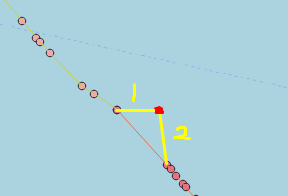
    - 예를 들어 1번으로 연결한다면 오히려 더 돌아가는 꼴이 된다. 그래서 2번으로 연결해야 한다. 
    - 즉 가장 가까운 점 + 1과 현재 위치를 연결한다. 길이, 현재 속도로 걸리는 시간 계산
    - **segment로 연결되는 길 내부에 지형(수심)이 맞지 않는 부분은 돌아서 가는 방법**(추후체크)
- segment 끝나는 지점까지 duration 계산
    - 현재 segment의 번호 확인. 변수명 seg_no
    - initial duration은 위에서 계산.
    - 현재 속도를 기준으로 남은 포인트 별로 남은 거리를 추출하여 duration_0 계산
    - 전체 segment 개수 - seg_no 하여 남아있는 segment 갯수 저장. 변수명 rest_of_seg_all_no
    - 기존의 평균 속도 / 현재 속도 계산하여 비율 확인. 
    - for i in rest_of_seg_all_no: 
        - 각 평균 속도 조정. 전체 길이 구하고, 평균 속도 * 감속 비율 = 새로운 평균속도 
        - duration_i 계산
    - 구한 duration_0 ~ duration_i_final 까지 모두 더하여 ETA 계산

In [176]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_25.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


282


In [219]:
df_test_2

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,224,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8339,38.9635,11.5,101.0,2022-11-19 22:24:43.599696,2022-11-19 13:20:25,2022-11-19 01:07:06,under way using engine,1071.303386,1386.146465
1,225,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8521,38.9608,11.6,102.0,2022-11-19 22:29:46.266674,2022-11-19 13:25:02,2022-11-19 01:07:06,under way using engine,1069.727209,1388.920303
2,226,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8962,38.9541,11.5,101.0,2022-11-19 22:39:53.134121,2022-11-19 13:35:45,2022-11-19 01:31:06,under way using engine,1065.901997,1379.157672
3,227,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9377,38.9484,11.6,102.0,2022-11-19 22:49:57.626655,2022-11-19 13:46:03,2022-11-19 01:49:08,under way using engine,1062.327066,1379.312051
4,228,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9571,38.9454,11.6,102.0,2022-11-19 22:55:01.041397,2022-11-19 13:50:45,2022-11-19 01:49:08,under way using engine,1060.642543,1377.124888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
305,529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
306,530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
307,531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [311]:
len(segmenting_index_list)

19

In [268]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [277]:
dura_list

[datetime.timedelta(0)]

In [269]:
ddd = sample.loc[20:,:]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,302,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9234,38.7583,17.3,100.0,2022-11-13 02:14:26.635679,2022-11-12 17:13:06,2022-11-12 04:49:07,under way using engine,975.243552,1774.126184,2022-11-14 15:12:26.635679,2022-11-14 16:00:40.036669,0 days 00:48:13.400990
21,303,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9588,38.7555,17.4,90.0,2022-11-13 02:19:30.128433,2022-11-12 17:18:47,2022-11-12 04:49:07,under way using engine,972.289659,1781.483085,2022-11-14 15:01:30.128433,2022-11-14 16:00:40.036669,0 days 00:59:09.908236
22,304,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3069,38.6642,16.3,100.0,2022-11-13 06:16:43.911342,2022-11-12 21:13:56,2022-11-12 04:49:07,under way using engine,861.436615,1460.142460,2022-11-14 17:38:43.911342,2022-11-14 16:00:40.036669,0 days 01:38:03.874673
23,305,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3941,38.6500,16.7,102.0,2022-11-13 06:31:51.759385,2022-11-12 21:29:16,2022-11-12 04:49:07,under way using engine,853.937365,1488.561795,2022-11-14 16:59:51.759385,2022-11-14 16:00:40.036669,0 days 00:59:11.722716
24,306,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.4214,38.6452,16.2,99.0,2022-11-13 06:36:54.628622,2022-11-12 21:34:11,2022-11-12 04:49:07,under way using engine,851.573173,1433.439883,2022-11-14 18:11:54.628622,2022-11-14 16:00:40.036669,0 days 02:11:14.591953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,483,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8127,35.0728,6.0,80.0,2022-11-14 15:45:30.478230,2022-11-14 06:42:40,2022-11-14 06:43:07,under way using engine,11.491783,17.159610,2022-11-14 15:45:30.478230,2022-11-14 16:00:40.036669,0 days 00:15:09.558439
202,484,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8261,35.0755,1.4,76.0,2022-11-14 16:00:40.036669,2022-11-14 06:58:29,2022-11-14 06:49:08,under way using engine,11.791119,67.307567,2022-11-14 16:00:40.036669,2022-11-14 16:00:40.036669,0 days 00:00:00
203,485,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8294,35.0774,0.0,90.0,2022-11-14 16:41:02.521600,2022-11-14 07:39:30,2022-11-14 07:37:07,moored,12.021023,NaN,NaT,NaT,NaT
204,486,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8293,35.0774,0.1,91.0,2022-11-14 17:26:27.030687,2022-11-14 08:24:24,2022-11-14 08:25:09,moored,12.020340,959.128537,NaT,NaT,NaT


In [270]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,302,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9234,38.7583,17.3,100.0,2022-11-13 02:14:26.635679,2022-11-12 17:13:06,2022-11-12 04:49:07,under way using engine,975.243552,1774.126184,2022-11-14 15:12:26.635679,2022-11-14 16:00:40.036669,0 days 00:48:13.400990
21,303,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9588,38.7555,17.4,90.0,2022-11-13 02:19:30.128433,2022-11-12 17:18:47,2022-11-12 04:49:07,under way using engine,972.289659,1781.483085,2022-11-14 15:01:30.128433,2022-11-14 16:00:40.036669,0 days 00:59:09.908236
22,304,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3069,38.6642,16.3,100.0,2022-11-13 06:16:43.911342,2022-11-12 21:13:56,2022-11-12 04:49:07,under way using engine,861.436615,1460.142460,2022-11-14 17:38:43.911342,2022-11-14 16:00:40.036669,0 days 01:38:03.874673
23,305,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3941,38.6500,16.7,102.0,2022-11-13 06:31:51.759385,2022-11-12 21:29:16,2022-11-12 04:49:07,under way using engine,853.937365,1488.561795,2022-11-14 16:59:51.759385,2022-11-14 16:00:40.036669,0 days 00:59:11.722716
24,306,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.4214,38.6452,16.2,99.0,2022-11-13 06:36:54.628622,2022-11-12 21:34:11,2022-11-12 04:49:07,under way using engine,851.573173,1433.439883,2022-11-14 18:11:54.628622,2022-11-14 16:00:40.036669,0 days 02:11:14.591953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,480,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7919,35.0257,13.1,340.0,2022-11-14 15:20:16.097459,2022-11-14 06:15:32,2022-11-14 06:13:06,under way using engine,6.723890,9.330926,2022-11-14 15:20:16.097459,2022-11-14 16:00:40.036669,0 days 00:40:23.939210
199,481,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7848,35.0622,8.5,9.0,2022-11-14 15:30:21.387551,2022-11-14 06:27:23,2022-11-14 06:25:07,under way using engine,10.769332,13.639817,2022-11-14 15:30:21.387551,2022-11-14 16:00:40.036669,0 days 00:30:18.649118
200,482,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7970,35.0721,6.5,90.0,2022-11-14 15:40:27.289966,2022-11-14 06:35:51,2022-11-14 06:25:07,under way using engine,11.579390,16.434245,2022-11-14 15:40:27.289966,2022-11-14 16:00:40.036669,0 days 00:20:12.746703
201,483,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8127,35.0728,6.0,80.0,2022-11-14 15:45:30.478230,2022-11-14 06:42:40,2022-11-14 06:43:07,under way using engine,11.491783,17.159610,2022-11-14 15:45:30.478230,2022-11-14 16:00:40.036669,0 days 00:15:09.558439


In [271]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [293]:
ddd["error"] = ddd["ETA"] - ddd["ATA"]

In [272]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [273]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [290]:
val = datetime.timedelta(days=0, hours=10)

In [291]:
val

datetime.timedelta(seconds=36000)

In [292]:
datetime.datetime(year=2022, month=12, day=10) + val

datetime.datetime(2022, 12, 10, 10, 0)

In [299]:
ddd.sort_values(by="error").head(1)["error"]

63   -1 days +21:07:48.073587
Name: error, dtype: timedelta64[ns]

In [275]:
ddd["error"].max()

Timedelta('0 days 03:41:30.803944')

In [276]:
ddd["error"].mean()

Timedelta('0 days 01:07:50.427369322')

In [81]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [182]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [128]:
dura_list = []
for i in globals():
    if "duration" in i and "cal_duration" not in i:
        dura_list.append(globals()[i])


In [129]:
# ETA calculation
accu_timedelta = datetime.timedelta(minutes=0)
for i in dura_list:
    accu_timedelta += i
ETA = current_timestamp + accu_timedelta

In [130]:
ETA

Timestamp('2022-11-14 17:36:26.635679')

In [133]:
ATA = pd.to_datetime('2022-11-14 16:00:40.036669')

평균 기준 아님. 샘플 하나 골라서 eta 구해본 것.

In [106]:
# 1. 기존
ETA - ATA

Timedelta('0 days 03:10:56.157449')

1. 기존   
- 에러 = Timedelta('0 days 03:10:56.157449')

In [134]:
# 2. 억까 수정
ETA - ATA

Timedelta('0 days 01:35:46.599010')

2. 억까 수정   
- 에러 = Timedelta('0 days 01:35:46.599010')

In [139]:
# 모든 항목 다 해보자.

3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법

In [300]:
#  1. 적용 안하면
# 샘플 데이터는 20부터. 
for sam in sample.index[20:]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [301]:
ddd = sample.loc[20:,:]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,302,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9234,38.7583,17.3,100.0,2022-11-13 02:14:26.635679,2022-11-12 17:13:06,2022-11-12 04:49:07,under way using engine,975.243552,1774.126184,2022-11-14 17:23:26.635679,2022-11-14 16:00:40.036669,0 days 01:22:46.599010
21,303,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9588,38.7555,17.4,90.0,2022-11-13 02:19:30.128433,2022-11-12 17:18:47,2022-11-12 04:49:07,under way using engine,972.289659,1781.483085,2022-11-14 17:28:30.128433,2022-11-14 16:00:40.036669,0 days 01:27:50.091764
22,304,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3069,38.6642,16.3,100.0,2022-11-13 06:16:43.911342,2022-11-12 21:13:56,2022-11-12 04:49:07,under way using engine,861.436615,1460.142460,2022-11-14 16:49:43.911342,2022-11-14 16:00:40.036669,0 days 00:49:03.874673
23,305,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3941,38.6500,16.7,102.0,2022-11-13 06:31:51.759385,2022-11-12 21:29:16,2022-11-12 04:49:07,under way using engine,853.937365,1488.561795,2022-11-14 17:04:51.759385,2022-11-14 16:00:40.036669,0 days 01:04:11.722716
24,306,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.4214,38.6452,16.2,99.0,2022-11-13 06:36:54.628622,2022-11-12 21:34:11,2022-11-12 04:49:07,under way using engine,851.573173,1433.439883,2022-11-14 17:09:54.628622,2022-11-14 16:00:40.036669,0 days 01:09:14.591953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,483,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8127,35.0728,6.0,80.0,2022-11-14 15:45:30.478230,2022-11-14 06:42:40,2022-11-14 06:43:07,under way using engine,11.491783,17.159610,2022-11-14 15:45:30.478230,2022-11-14 16:00:40.036669,0 days 00:15:09.558439
202,484,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8261,35.0755,1.4,76.0,2022-11-14 16:00:40.036669,2022-11-14 06:58:29,2022-11-14 06:49:08,under way using engine,11.791119,67.307567,2022-11-14 16:00:40.036669,2022-11-14 16:00:40.036669,0 days 00:00:00
203,485,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8294,35.0774,0.0,90.0,2022-11-14 16:41:02.521600,2022-11-14 07:39:30,2022-11-14 07:37:07,moored,12.021023,NaN,NaT,NaT,NaT
204,486,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8293,35.0774,0.1,91.0,2022-11-14 17:26:27.030687,2022-11-14 08:24:24,2022-11-14 08:25:09,moored,12.020340,959.128537,NaT,NaT,NaT


In [304]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,302,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9234,38.7583,17.3,100.0,2022-11-13 02:14:26.635679,2022-11-12 17:13:06,2022-11-12 04:49:07,under way using engine,975.243552,1774.126184,2022-11-14 17:23:26.635679,2022-11-14 16:00:40.036669,0 days 01:22:46.599010
21,303,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,118.9588,38.7555,17.4,90.0,2022-11-13 02:19:30.128433,2022-11-12 17:18:47,2022-11-12 04:49:07,under way using engine,972.289659,1781.483085,2022-11-14 17:28:30.128433,2022-11-14 16:00:40.036669,0 days 01:27:50.091764
22,304,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3069,38.6642,16.3,100.0,2022-11-13 06:16:43.911342,2022-11-12 21:13:56,2022-11-12 04:49:07,under way using engine,861.436615,1460.142460,2022-11-14 16:49:43.911342,2022-11-14 16:00:40.036669,0 days 00:49:03.874673
23,305,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.3941,38.6500,16.7,102.0,2022-11-13 06:31:51.759385,2022-11-12 21:29:16,2022-11-12 04:49:07,under way using engine,853.937365,1488.561795,2022-11-14 17:04:51.759385,2022-11-14 16:00:40.036669,0 days 01:04:11.722716
24,306,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 06:00:00,120.4214,38.6452,16.2,99.0,2022-11-13 06:36:54.628622,2022-11-12 21:34:11,2022-11-12 04:49:07,under way using engine,851.573173,1433.439883,2022-11-14 17:09:54.628622,2022-11-14 16:00:40.036669,0 days 01:09:14.591953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,480,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7919,35.0257,13.1,340.0,2022-11-14 15:20:16.097459,2022-11-14 06:15:32,2022-11-14 06:13:06,under way using engine,6.723890,9.330926,2022-11-14 15:20:16.097459,2022-11-14 16:00:40.036669,0 days 00:40:23.939210
199,481,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7848,35.0622,8.5,9.0,2022-11-14 15:30:21.387551,2022-11-14 06:27:23,2022-11-14 06:25:07,under way using engine,10.769332,13.639817,2022-11-14 15:30:21.387551,2022-11-14 16:00:40.036669,0 days 00:30:18.649118
200,482,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.7970,35.0721,6.5,90.0,2022-11-14 15:40:27.289966,2022-11-14 06:35:51,2022-11-14 06:25:07,under way using engine,11.579390,16.434245,2022-11-14 15:40:27.289966,2022-11-14 16:00:40.036669,0 days 00:20:12.746703
201,483,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8127,35.0728,6.0,80.0,2022-11-14 15:45:30.478230,2022-11-14 06:42:40,2022-11-14 06:43:07,under way using engine,11.491783,17.159610,2022-11-14 15:45:30.478230,2022-11-14 16:00:40.036669,0 days 00:15:09.558439


In [305]:
ddd['error'].mean()

Timedelta('0 days 00:54:53.301808830')

In [306]:
ddd['error'].max()

Timedelta('0 days 02:37:42.117110')

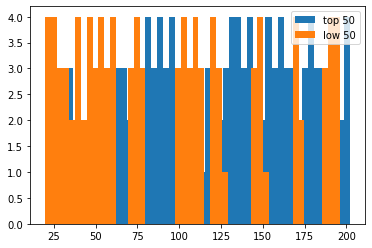

In [307]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [308]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       376
speed                                      18.2
timestamp            2022-11-14 02:12:55.355840
ETA                  2022-11-14 16:28:55.355840
error                    0 days 00:28:15.319171
remained_distance                    336.230394
Name: 94, dtype: object

In [309]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       357
speed                                      18.6
timestamp            2022-11-14 00:37:01.862225
ETA                  2022-11-14 17:14:01.862225
error                    0 days 01:13:21.825556
remained_distance                    356.001552
Name: 75, dtype: object